In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import svm;
import numpy as np;
import matplotlib.pyplot as plt;
from DataParser import DataParser;
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
def train(train_data, train_labels):
    train_data = train_data.flatten()
    train_labels = train_labels.flatten()

    train_data = np.stack([train_data.real, train_data.imag], axis=-1)

    train_labels_real = train_labels.real > 0
    train_labels_imag = train_labels.imag > 0
    
    #Create a svm Classifier
    clf_real = svm.SVC(kernel='linear')
    clf_imag = svm.SVC(kernel='linear') 

    #Train the model using the training sets
    clf_real.fit(train_data, train_labels_real)
    clf_imag.fit(train_data, train_labels_imag)

    return (clf_real, clf_imag)


In [17]:
def predict(test_data, labels_data, model):
    clf_real = model[0]
    clf_imag = model[1]
    test_data = test_data.flatten()

    test_data = np.stack([test_data.real, test_data.imag], axis=-1)

    test_labels_real = labels_data.real > 0
    test_labels_imag = labels_data.imag > 0

    labels_pred_real = clf_real.predict(test_data)
    labels_pred_imag = clf_imag.predict(test_data)

    labels_pred = np.where(labels_pred_real & labels_pred_imag, 1, np.where(~labels_pred_real & labels_pred_imag, 2, np.where(~labels_pred_real & ~labels_pred_imag, 3,np.where(labels_pred_real & ~labels_pred_imag, 4, 0))))

    test_labels = np.where(test_labels_real & test_labels_imag, 1,np.where(~test_labels_real & test_labels_imag, 2,np.where(~test_labels_real & ~test_labels_imag, 3,np.where(test_labels_real & ~test_labels_imag, 4, 0))))
    labels_pred = labels_pred.reshape((8, 25000))
    test_labels = test_labels.reshape((8, 25000))

    return labels_pred, test_labels

In [5]:
def visualize_data(predicted_labels, test_labels, allSNR=False, perSNR=False):
    if allSNR:
        ConfusionMatrixDisplay.from_predictions(test_labels.flatten(), predicted_labels.flatten(),)
        plt.title(f"Confusion matrix for all SNR values, accuracy: {np.mean(predicted_labels == test_labels)}")
        plt.show()
    if perSNR:
        accuracy = np.zeros(8)
        for i in range(8):
            accuracy[i] = np.mean(predicted_labels[i] == test_labels[i])
            ConfusionMatrixDisplay.from_predictions(test_labels[i].flatten(), predicted_labels[i].flatten(),)
            plt.title(f"Confusion matrix for SNR={dataSet.SNR[i]}, accuracy: {accuracy[i]}")
            plt.show()
        plt.plot(dataSet.SNR.values(), accuracy, marker="o")
        plt.title("Accuracy per SNR")
        plt.xlabel("SNR")
        plt.ylabel("Accuracy")

In [19]:
dataSet = DataParser('../data/DataForML.mat')
train_data, train_labels = dataset.get_train_dataV1(True)
test_data, test_labels = dataset.get_test_dataV1(True)

model = train(train_data, train_labels)

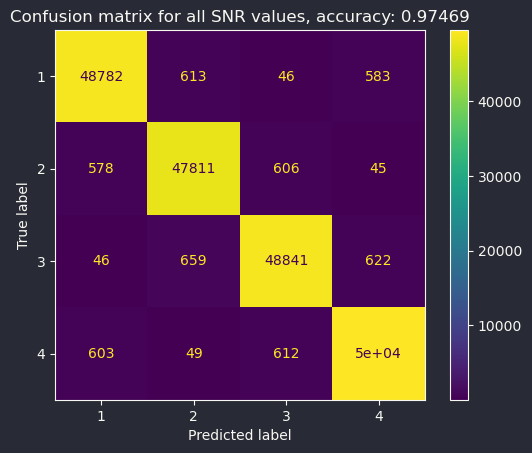

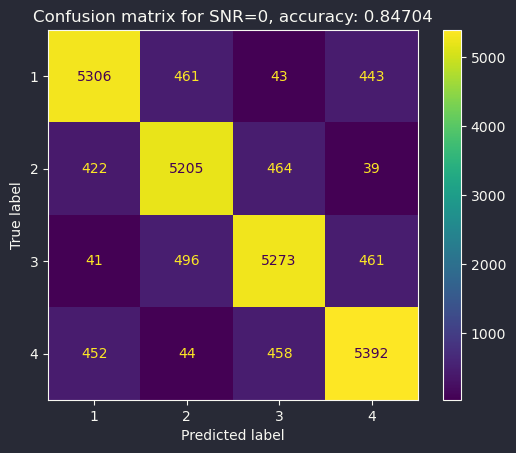

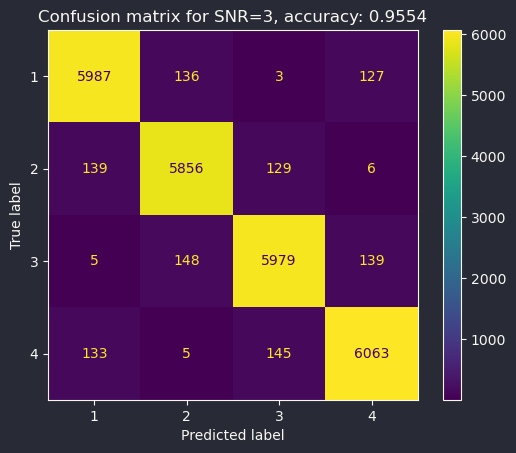

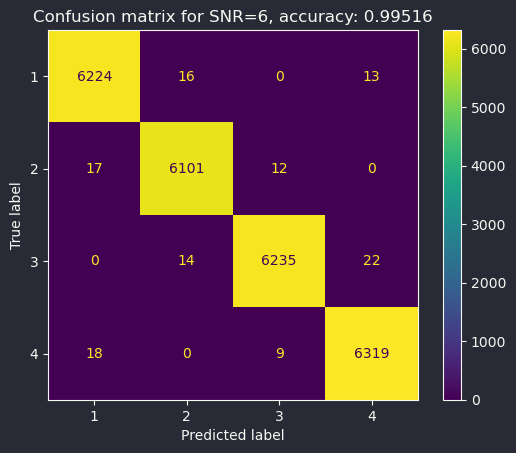

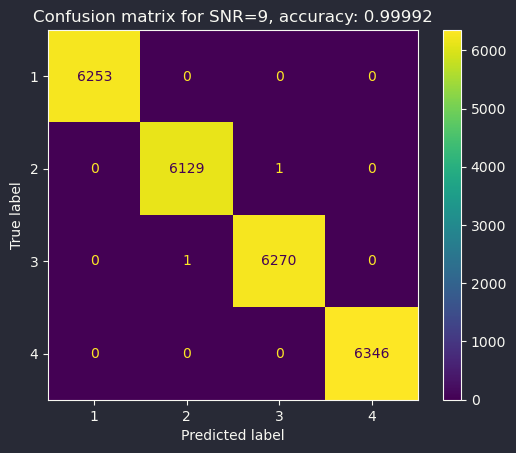

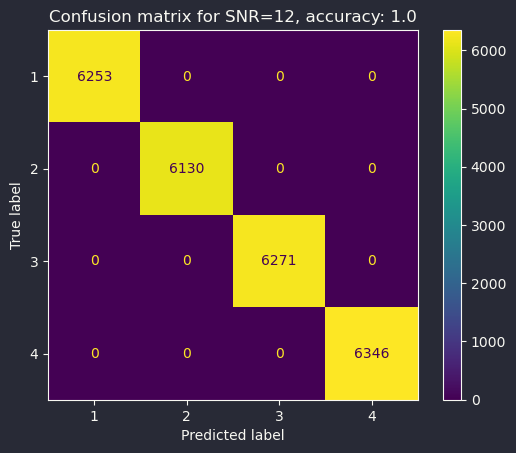

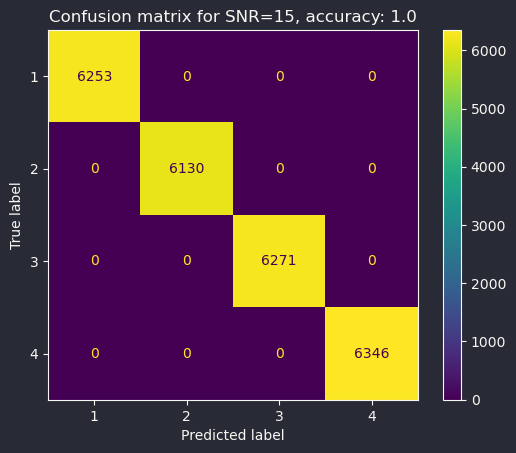

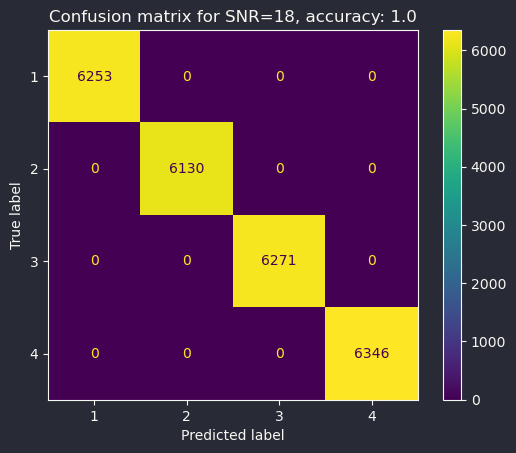

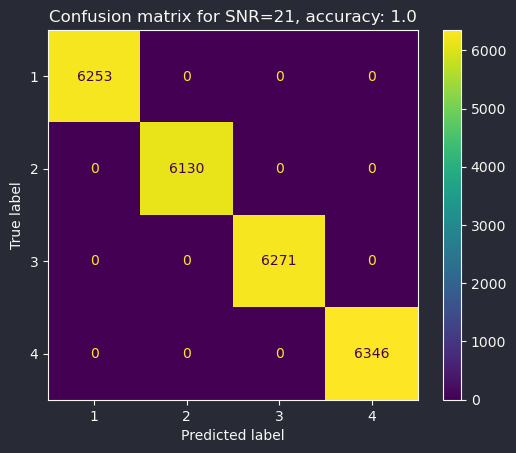

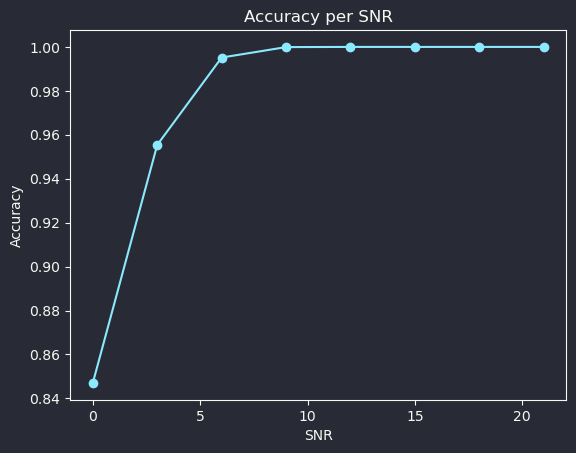

In [20]:

labels_pred, test_labels = predict(test_data, test_labels, model)
visualize_data(labels_pred, test_labels, allSNR=True, perSNR=True)

In [21]:
dataSet = DataParser('../data/DataForML.mat')
train_data, train_labels = dataSet.get_train_dataV2(True)
test_data, test_labels = dataSet.get_test_dataV1(True)

model2 = train(train_data, train_labels)

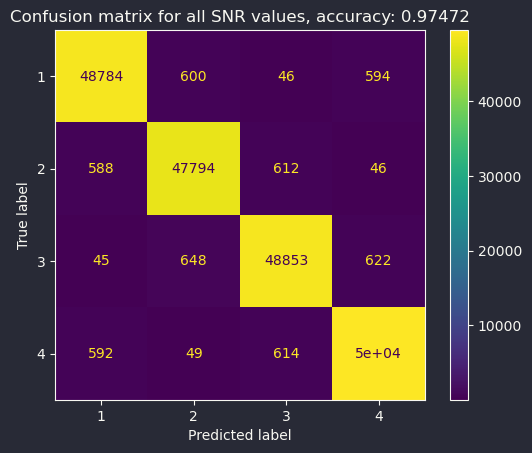

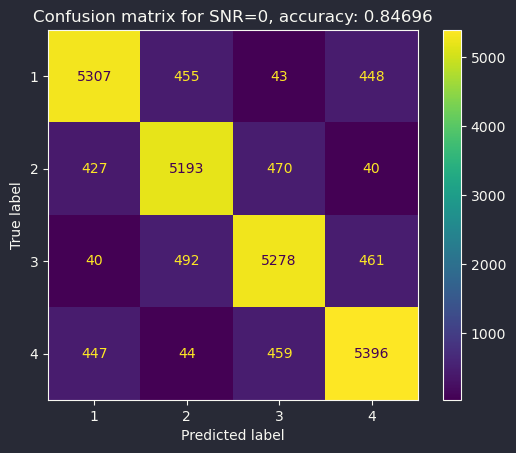

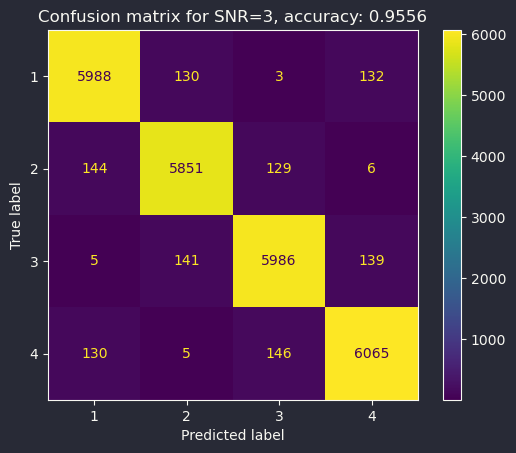

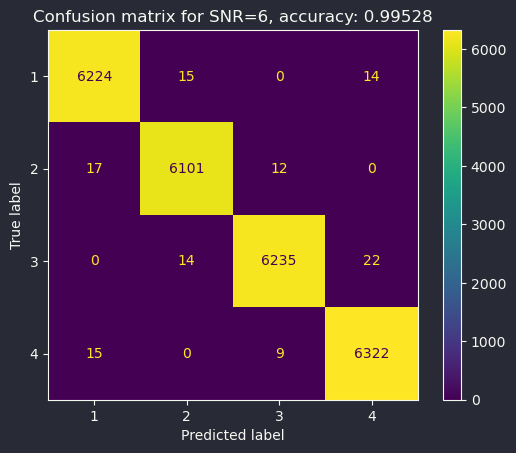

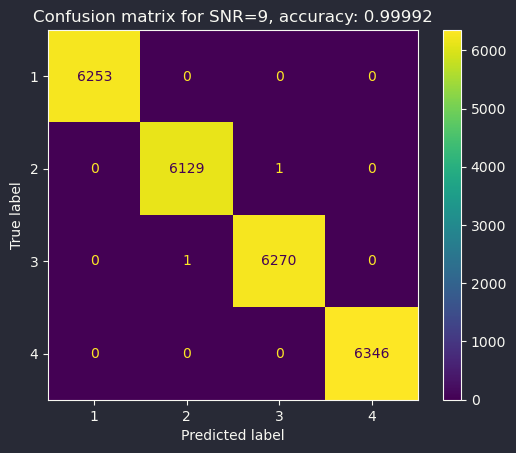

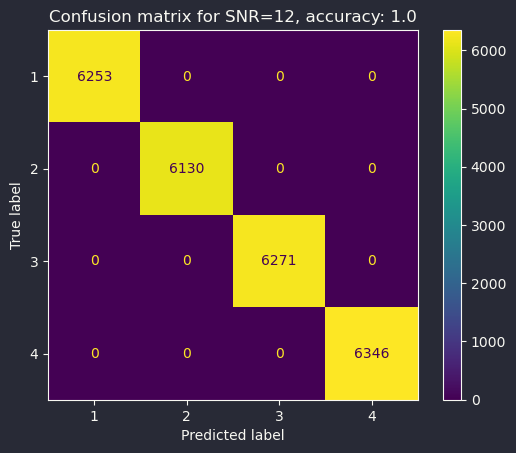

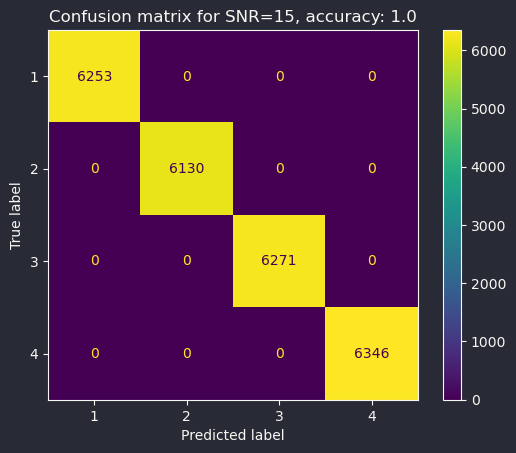

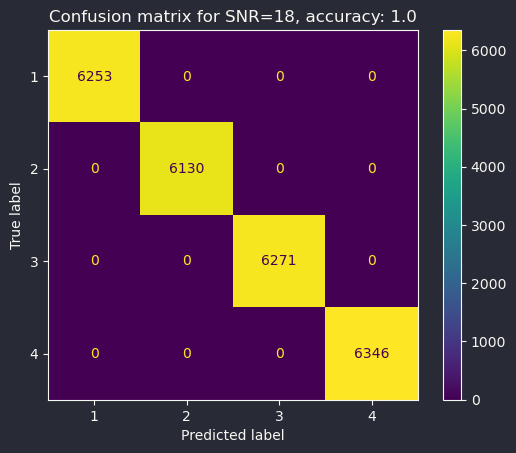

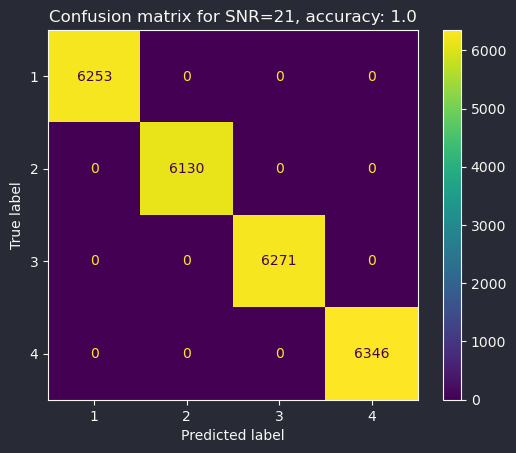

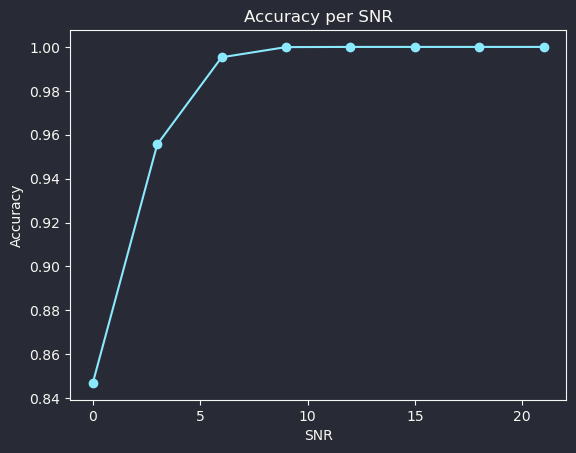

In [22]:
labels_pred, test_labels = predict(test_data, test_labels, model2)
visualize_data(labels_pred, test_labels, allSNR=True, perSNR=True)

In [29]:
def train(train_data, train_labels):
    train_data = np.moveaxis(train_data, 0, -1)
    train_data = np.stack([train_data.real, train_data.imag], axis=-1)
    train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], -1))
    train_data = train_data.reshape((-1, train_data.shape[-1]))
    print(train_data.shape)
    train_labels = train_labels.flatten()
    print(train_labels.shape)

    train_labels_real = train_labels.real > 0
    train_labels_imag = train_labels.imag > 0
    
    #Create a svm Classifier
    clf_real = svm.SVC(kernel='linear')
    clf_imag = svm.SVC(kernel='linear') 

    #Train the model using the training sets
    clf_real.fit(train_data, train_labels_real)
    clf_imag.fit(train_data, train_labels_imag)

    return (clf_real, clf_imag)


In [30]:
dataSet = DataParser('../data/DataForML.mat')
train_data, train_labels = dataSet.get_train_multipath(True)
test_data, test_labels = dataSet.get_test_multipath(True)
print(train_data.shape)
model2 = train(train_data, train_labels)

(3, 8, 20000)
(160000, 6)
(160000,)


In [33]:
def predict(test_data, labels_data, model):
    clf_real = model[0]
    clf_imag = model[1]
    test_data = np.moveaxis(test_data, 0, -1)
    test_data = np.stack([test_data.real, test_data.imag], axis=-1)
    test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], -1))
    test_data = test_data.reshape((-1, test_data.shape[-1]))

    labels_data = labels_data.flatten()

    test_labels_real = labels_data.real > 0
    test_labels_imag = labels_data.imag > 0

    labels_pred_real = clf_real.predict(test_data)
    labels_pred_imag = clf_imag.predict(test_data)

    labels_pred = np.where(labels_pred_real & labels_pred_imag, 1, np.where(~labels_pred_real & labels_pred_imag, 2, np.where(~labels_pred_real & ~labels_pred_imag, 3,np.where(labels_pred_real & ~labels_pred_imag, 4, 0))))

    test_labels = np.where(test_labels_real & test_labels_imag, 1,np.where(~test_labels_real & test_labels_imag, 2,np.where(~test_labels_real & ~test_labels_imag, 3,np.where(test_labels_real & ~test_labels_imag, 4, 0))))
    labels_pred = labels_pred.reshape((8, 25000))
    test_labels = test_labels.reshape((8, 25000))

    return labels_pred, test_labels

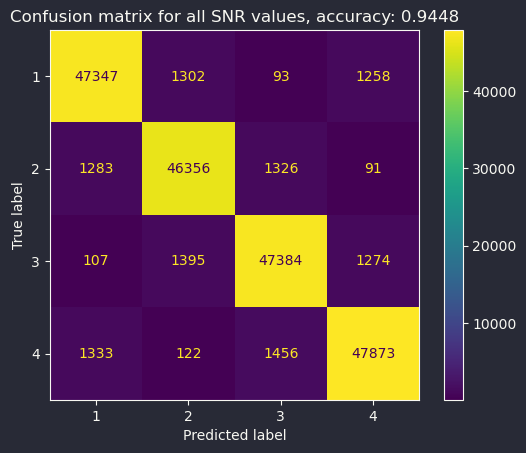

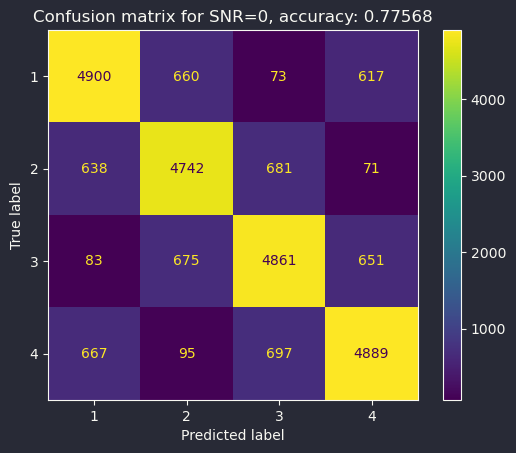

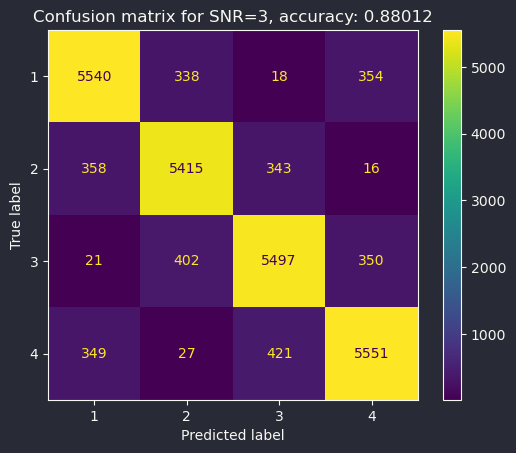

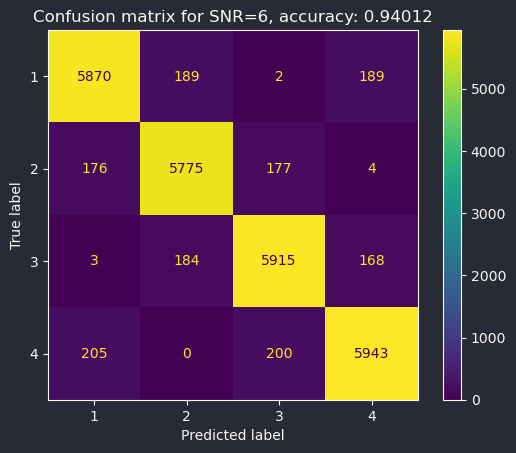

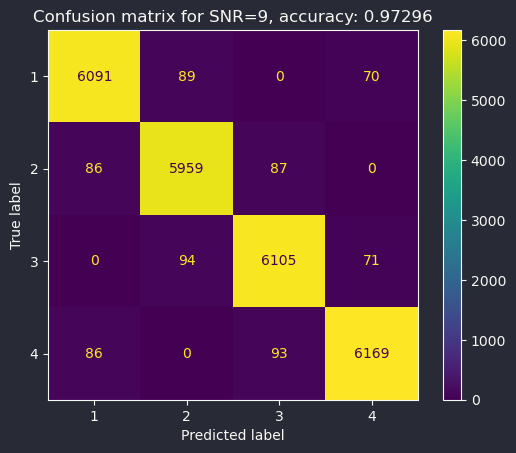

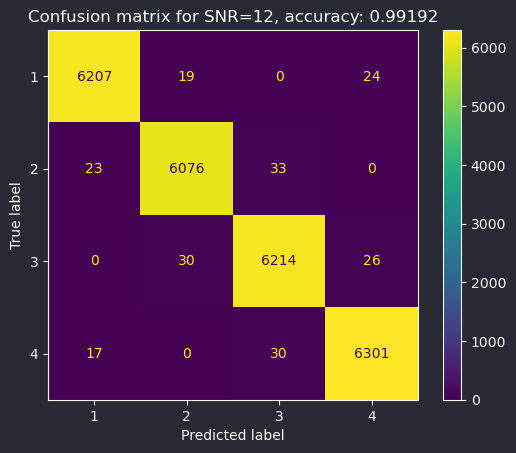

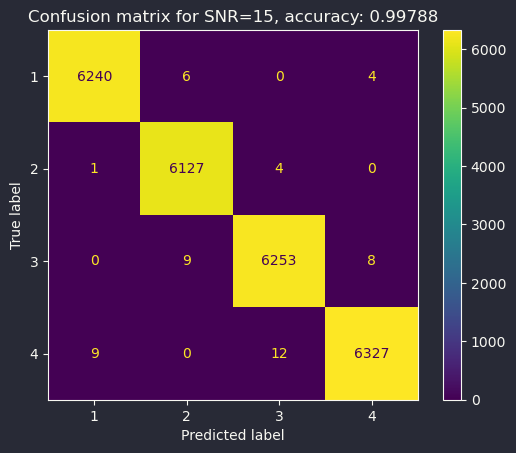

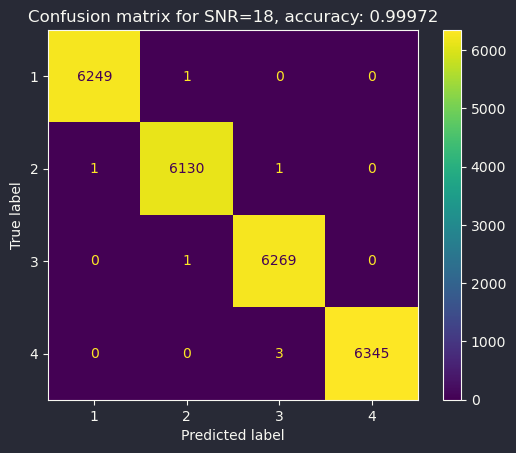

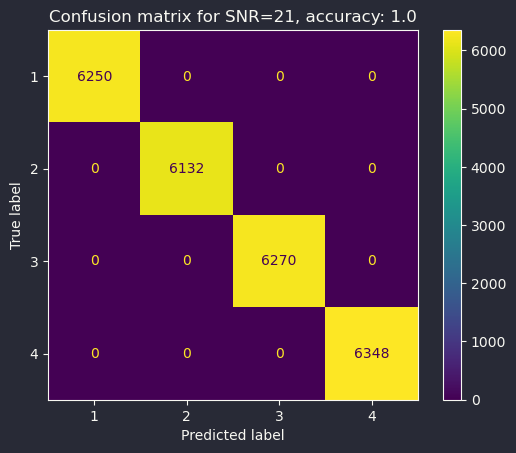

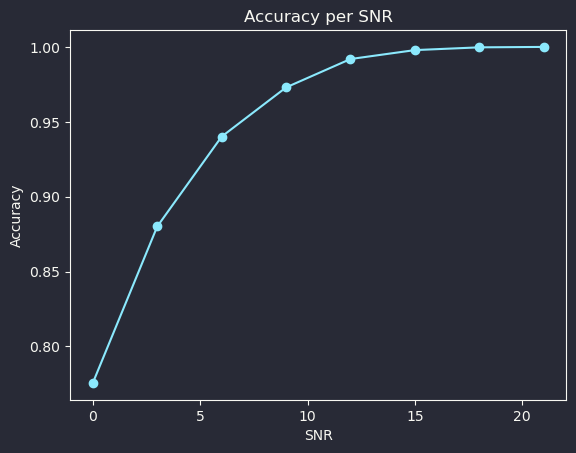

In [34]:
labels_pred, test_labels = predict(test_data, test_labels, model2)
visualize_data(labels_pred, test_labels, allSNR=True, perSNR=True)